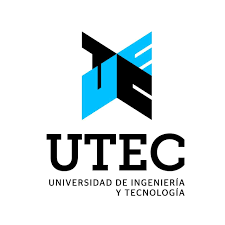



# **PROYECTO 2 CLUSTERING**

---






DOCENTE:


*   Cristian Delgado

ALUMNOS:


1.   Carlos Villanueva Alcarraz
2.   Sheyla Ccahua
3.   Renzo Alegre

## **1. IMPORTE DE ARCHIVO DATASET_TISSUE**

In [ ]:
# Importamos el dataset_tissue
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
archivo_path = '/content/drive/MyDrive/dataset_tissue.txt'

# Guardamos en un dataframe el archivo
df = pd.read_csv(archivo_path, delimiter=',', index_col=0)
# Transponemos de tal forma que las columnas se vuelven las caracteristicas y las filas las muestras e imprimimos
df=df.T
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.921690,5.718190,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.339130,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.962430,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.415980,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.603650,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
GSM12067.CEL.gz,10.157605,6.606701,8.116336,10.832528,5.334905,8.303227,7.078587,5.728177,8.967108,5.484559,...,8.205598,5.612748,6.581476,8.577977,8.064061,6.438092,6.053994,7.971105,8.421945,7.540570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,7.095949,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.900080,6.982293,5.998825,6.779777,5.370535,...,7.056859,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.073740
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,8.314995,5.651090,7.546900,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.643660,5.501452,...,7.860281,5.741697,7.509888,7.643282,8.384567,6.645890,7.644610,8.195537,8.589336,7.627872


In [ ]:
# Observamos que el dataset tiene 189 filas (muestras ) y 22215 columnas (caracteristicas) por lo cual debemos realizar una reduccion de dimensionalidad
df.shape

(189, 22215)

## **2. REDUCCION DE DIMENSIONALIDAD MEDIANTE SVD**

Obtenemos los Vectores singulares izquierda "u" , valores singulares "s" y vectores singulares derecha "v_transp"

In [ ]:
import numpy as np
from scipy.linalg import svd
# Extraememos los vectores y valores
u,s,v_transp=svd(df)

La matriz "s" contiene los valores singulares en orden decreciente, evaluaremos cuales seran los k primeros valores singulares en base al % de informacion *acumulada*

Informacion que aporta cada singular value :
 [59.05407697532743, 3.1309258819249437, 2.0325776798454913, 1.6185392329372212, 1.359224378879473, 1.2552107708939342, 1.091038397845976, 1.0624363783746475, 0.784455367658211, 0.6728044359656876, 0.609307827285785, 0.5815857065653435, 0.5588639031843161, 0.49805993913548247, 0.4761202082451418, 0.4194748362965188, 0.40914122814920256, 0.3806582177658828, 0.3695867494737324, 0.35889779556733864, 0.3478603006397765, 0.32236255750543813, 0.3061038747451271, 0.30380156303864075, 0.2970755321231177, 0.29354969118742436, 0.28436300906663453, 0.2791737569987584, 0.2692718929102854, 0.26669022318996793, 0.26040161282266483, 0.25466804339003696, 0.2515834528999778, 0.24879852460307333, 0.24575792489438036, 0.23882460065857766, 0.2355559148348108, 0.23102683540158708, 0.22965767248097102, 0.22681547305765057, 0.2256749265546751, 0.2220710300454696, 0.2195558196566237, 0.21540906930161666, 0.21285401563000944, 0.21051703639989025, 0.20454695202901577

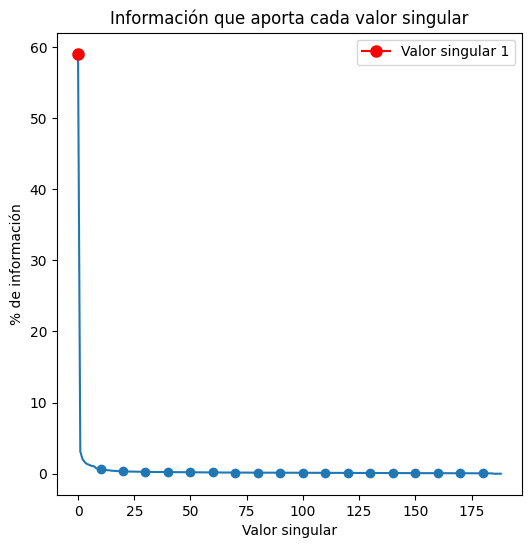

In [ ]:
import matplotlib.pyplot as plt
# determinamos el porcentaje de la informacion que esta en la matriz "s" en la lista sigma_s
sigma_s=[]
for i in range(len(s)):
  a=(s[i]/sum(s))*100
  sigma_s.append(a)

#Imprimimos la informacion en % que aporta cada valor singular
print("Informacion que aporta cada singular value :\n", sigma_s)

indice_valor_a_marcar = 0  # Cambia esto al índice del valor que deseas marcar

# Mostramos en una imagen el % de informacion que aporta cada valor singular
plt.figure(figsize=(6, 6))
plt.plot(sigma_s, marker='o', linestyle='-', markevery=10)
plt.xlabel("Valor singular")
plt.ylabel("% de información")
plt.title("Información que aporta cada valor singular")

# Marcamos el valor específico en el gráfico
plt.plot(indice_valor_a_marcar, sigma_s[indice_valor_a_marcar], marker='o', markersize=8, color='red', label=f'Valor singular {indice_valor_a_marcar+1}')

# Mostramos la leyenda para indicar qué representa el marcador rojo
plt.legend()

# Mostramos el gráfico
plt.show()


En la figura podemos observar que el primer valor singular tiene un 60% de informacion aprox.
Como se espera tener una informacion de 90% se observa que para los **80 primeros valores singulares se llega a este objetivo**

In [ ]:
# Imprimimos el porcentaje de informacion en los 80 primeros valores
print('\n Porcentaje acumulado: \n', sum(sigma_s[0:80]))


 Porcentaje acumulado: 
 89.37210387673238


Obtencion de la matriz reducida B con los primeros 80 valores singulares, que viene a ser el producto de UxS (matriz de vectores singulares izquierdos por matriz de valores singulares)

In [ ]:
# Obtenemos las dimensiones de nuestro dataframe
m,n =np.shape(df)
#Creamos una matriz de todos los valores singulares considerando la menor cantidad entre filas y columnas
Sigma=np.zeros((m,n))
for i in range(min(m,n)):
  Sigma[i,i]=s[i]

# Debido a que determinamos que se requiere que los valores singulares tengan el 90% de informacion y para eso cumple  con los 80 primeros valores singulares
n_valores=80

U_k=u[:,:n_valores]

Sigma_k=Sigma[:n_valores,:n_valores]
VT_K=v_transp[:n_valores,:]

# Matriz reducidad
B=np.dot(U_k,Sigma_k)

# Guardamos en un dataframe
df2=pd.DataFrame(B)
normalized_features=df2

Imprimimos la matriz reducidad de 189 filas con 80 columnas (muestras x caracteristicas respectivamente)

In [ ]:
normalized_features

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-1133.630508,-33.588825,-26.130504,51.002917,2.978713,21.509362,4.093094,-23.158597,6.069318,-17.874114,...,1.540805,3.829239,-3.784203,-0.714431,-0.562765,7.585600,2.853956,1.113568,1.489301,-6.725219
1,-1133.666630,-41.706462,-35.719768,36.465480,-2.040347,10.239882,0.473485,-4.631002,-31.968426,-1.559038,...,-0.839339,4.991801,1.429717,-11.467581,-2.753992,-8.312447,-2.662488,2.530378,1.435930,0.892754
2,-1129.058954,-41.439304,4.748605,36.010141,-1.214190,48.140621,-2.929075,-38.341255,28.913955,2.099353,...,0.141198,-0.976930,0.672821,-0.277153,1.330271,-1.202143,0.012381,-2.571471,-0.616969,2.613323
3,-1134.639478,-40.259375,-8.529697,31.667551,3.702954,37.406285,-11.997369,-4.261622,-38.825031,1.453349,...,-2.255231,-2.540363,-1.685890,-5.556767,-3.561977,-4.536212,-3.001962,-6.481222,2.108341,3.109326
4,-1131.017082,-36.315465,-18.559611,44.670370,5.101189,27.243399,-6.871843,-11.100300,-43.555604,-4.056118,...,0.418405,0.342264,-3.480108,-5.493538,-4.188937,0.306114,0.072930,5.600327,-4.545570,-3.450604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1127.137737,-25.053421,-51.375641,6.915322,-19.833357,-59.183918,-80.624521,-37.740943,6.900753,-13.505737,...,1.212107,1.456385,1.075925,-1.264928,1.722558,3.621078,-0.452211,-2.337243,1.367868,2.097974
185,-1127.249820,-39.781832,-44.522001,-10.129172,-18.132368,-50.645653,-92.338447,-26.067011,5.848004,0.521125,...,1.481904,2.286275,2.173980,5.955511,-4.440393,-7.742822,9.495984,-0.996571,-4.798242,-2.366504
186,-1131.166016,-44.122989,-35.853552,-11.577769,-16.691875,-49.896606,-100.267154,-28.743604,1.234866,-2.608064,...,10.275235,-14.664212,-5.651325,2.251197,9.729621,-3.555676,-6.049570,9.439901,-0.381595,-4.593275
187,-1125.807470,-45.544643,-24.590593,-21.380718,-14.270762,-37.575300,-102.740977,-19.890971,-0.475663,3.899765,...,-7.081413,11.008252,8.696580,4.035945,-3.072764,-4.193271,9.832277,-3.583498,-3.018485,4.391546


## **3.-ALGORITMOS DE CLUSTERING K-MEANS , DBSCAN Y GMM**

### **3.1.- DETERMINACION DEL VALOR K EN EL K-MEANS**

Calculamos el valor de la suma de los cuadrados intra-cluster (WCSS) para diferentes números de clústeres (desde 1 hasta 19) utilizando el algoritmo de KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

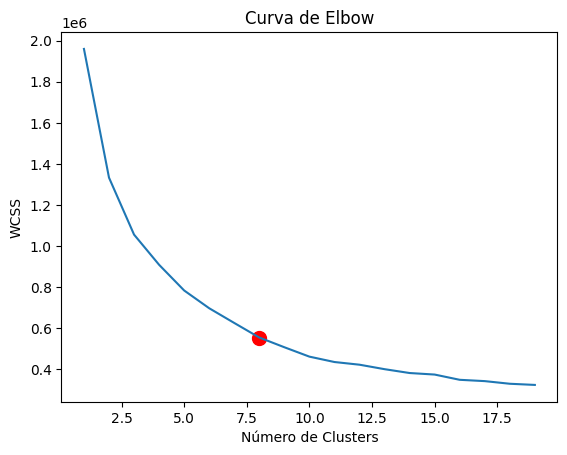

In [ ]:
wcss=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i, max_iter=300, random_state=42)
  kmeans.fit(normalized_features)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title("Curva de Elbow")
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

# Marcar el punto de codo en el gráfico
plt.scatter(8, wcss[7], c='red', marker='o', s=100)
plt.show()

 En el gráfico, el número de clústeres se representa en el eje X y el valor de WCSS se representa en el eje Y. Al observar el gráfico resultante, puedes identificar el punto en el que la disminución en WCSS comienza a aplanarse, lo que se conoce como el codo. Este punto es a menudo considerado como el número óptimo de clústeres para el conjunto de datos. Observamos que en la grafica el valor esta a partir de **K=7.5**






Utilizar la curva de codo es un poco tosco para determinar la cantidad de cluster, por lo que utilizaremos tambien otra metrica llamada silhoutte

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

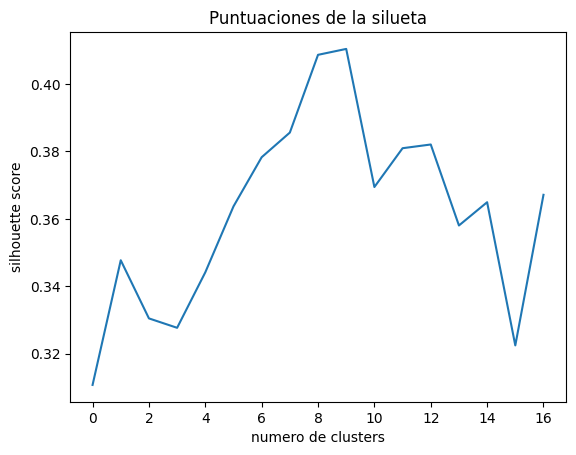

In [ ]:
from sklearn.metrics import silhouette_score
sil_scores = []
#Determinamos el valor silhoutte para cada cluster
for i in range(2, 20):  # Comenzamos desde 2 ya que Silhouette Score requiere al menos 2 clústeres
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=42)
    kmeans.fit(normalized_features)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(normalized_features, labels))

#Graficamos
plt.plot(np.arange(0, 17),sil_scores[:17])
plt.title("Puntuaciones de la silueta")
plt.xlabel('numero de clusters')
plt.ylabel('silhouette score')
plt.show()

En el gráfico resultante, se busca un número de clústeres que tenga una alta puntuación de silueta, lo que indica una buena estructura de clúster ya que, un valor más alto indica que los objetos en los clústeres están bien agrupados, es decir, son más similares a los objetos dentro de su propio clúster que a los objetos en otros clústeres cercanos. **K=8**

### **3.2.- DETERMINACION DEL VALOR EPOCAS EN EL DBSCAN**

En DBSCAN, el valor de ε representa la distancia máxima entre dos puntos para que uno sea considerado como vecino del otro. Un valor adecuado de ε es crucial para el rendimiento de DBSCAN, ya que determina qué puntos se agruparán juntos en clústeres. Si ε es demasiado pequeño, muchos puntos pueden considerarse como ruido y no se agruparán en ningún clúster. Por otro lado, si ε es demasiado grande, varios clústeres pueden combinarse en un solo clúster, perdiendo así la estructura intrínseca de los datos.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

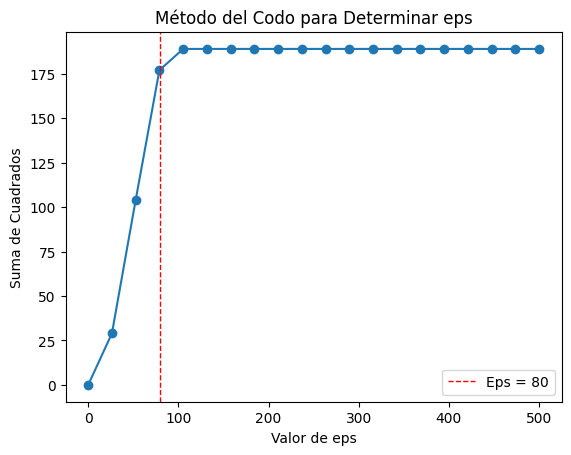

In [ ]:
distances = pairwise_distances(normalized_features)

eps_values = np.linspace(0.1, 500.0, 20)
sum_of_squares = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5, metric='precomputed')
    labels = dbscan.fit_predict(distances)
    sum_of_squares.append((labels != -1).sum())

import matplotlib.pyplot as plt
plt.plot(eps_values, sum_of_squares, marker='o')
plt.xlabel('Valor de eps')
plt.ylabel('Suma de Cuadrados')
plt.title('Método del Codo para Determinar eps')

# Marca el valor de epsilon igual a 80 con una línea vertical
plt.axvline(x=80, color='r', linestyle='--', linewidth=1, label='Eps = 80')

plt.legend()  # Muestra la leyenda
plt.show()

Observamos en la grafica que el número de puntos se "aplanan", significa que agregar más vecinos (aumentar ε) no aumenta significativamente la cantidad de puntos que son considerados core points, ya que la estructura fundamental de los clústeres ya ha sido identificada.  De esto , podemos colocar un **eps= 80**

### **3.3.- DETERMINACION DEL NUMERO DE COMPONENTES EN EL GMM**

Determinar el número de componentes (también conocidos como clústeres) en un modelo GMM para un buen emparejamiento de la informacion

Generaremos gráfico que compara los valores del Criterio de Información Bayesiano (BIC, por sus siglas en inglés) para diferentes números de componentes en un modelo de Mezclas Gaussianas (Gaussian Mixture Model, GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

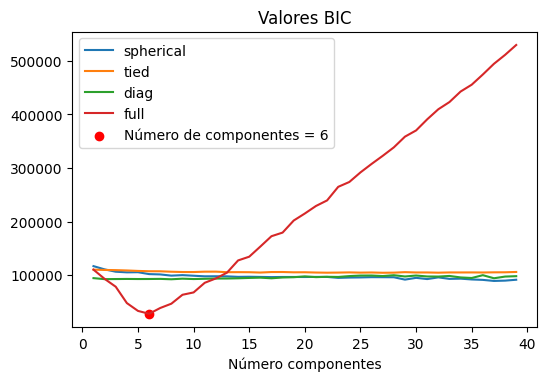

In [ ]:


fig, ax = plt.subplots(figsize=(6, 3.84))

n_components = range(1, 40)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []

    for i in n_components:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo = modelo.fit(normalized_features)
        valores_bic.append(modelo.bic(normalized_features))

    ax.plot(n_components, valores_bic, label=covariance_type)

# Encuentra el índice correspondiente al valor 6
index_6 = 6 - 1  # Restamos 1 porque el índice comienza en 0

# Obtiene el valor BIC correspondiente a 6 componentes para todas las matrices de covarianza
bic_6_components = valores_bic[index_6]

# Marca el valor 6 con un punto en la gráfica
ax.scatter(6, bic_6_components, color='r', label='Número de componentes = 6')

ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend()
plt.show()


Observamos que el menor BIC nos proporciona **6 componentes** por lo que escogemos este valor , esto es debido a que representa un equilibrio óptimo entre el ajuste del modelo a los datos y la complejidad del modelo. Un modelo con un BIC más bajo indica que es más probable que ese modelo sea el verdadero generador de los datos observados, dado el equilibrio entre el ajuste y la penalización por la complejidad

### **3.4.- APLICACION DE LOS ALGORITMOS DE CLUSTERING A LA DATA DE TEJIJOS**

Determinados ya los hiperparametros a utilizar en los algoritmos, realizamos el proceso de clustering en nuestra dataset reducida de tejidos.

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# Algoritmo de cluster K-means
clustering=KMeans(n_clusters=8,max_iter=300, random_state=42)
kmeans_clusters=clustering.fit_predict(normalized_features)


# Algoritmo de cluster DBSCAN
dbscan = DBSCAN(eps=80, min_samples=5)
dbscan_clusters = dbscan.fit_predict(normalized_features)
# Obtenemos índices de puntos ruidosos (outliers)
outlier_indices = (dbscan_clusters == -1)
nearest_cluster_indices = pairwise_distances_argmin_min(normalized_features[outlier_indices], normalized_features[dbscan_clusters!= -1])[0]
dbscan_clusters[outlier_indices] = dbscan_clusters[nearest_cluster_indices]
dbscan_clusters[185]=dbscan_clusters[184]

# Algoritmo de cluster GMM
gmm = GaussianMixture(n_components= 6, covariance_type = 'full',random_state = 123)
gmm_clusters = gmm.fit_predict(normalized_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
real_labels = pd.read_csv('/content/drive/MyDrive/clase.txt',index_col=0)

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score


etiquetas_reales=real_labels.values.flatten()

# metrica de indice de rand ajustado (ARI)
ari = adjusted_rand_score(etiquetas_reales, kmeans_clusters)
aridb = adjusted_rand_score(etiquetas_reales, dbscan_clusters)
arigmm = adjusted_rand_score(etiquetas_reales, gmm_clusters)

#  metrica de mutual information score (MIS)
mis = normalized_mutual_info_score(etiquetas_reales, kmeans_clusters)
misdb = normalized_mutual_info_score(etiquetas_reales, dbscan_clusters)
misgmm = normalized_mutual_info_score(etiquetas_reales, gmm_clusters)

# métrica fowlkes-mallows (FMI)
fmi = fowlkes_mallows_score(etiquetas_reales, kmeans_clusters)
fmidb = fowlkes_mallows_score(etiquetas_reales, dbscan_clusters)
fmigmm = fowlkes_mallows_score(etiquetas_reales, gmm_clusters)


print(f"Índice de Rand Ajustado k-means(ARI):{ari:.2f}")
print(f"Mutual Information Score k-means(MIS): {mis:.2f}")
print(f"Métrica Fowlkes-Mallows k-means(FMI): {fmi:.2f}")
print(f"Índice de Rand Ajustado DBSCAN (ARI):{aridb:.2f}")
print(f"Mutual Information Score DBSCAN (MIS): {misdb:.2f}")
print(f"Métrica Fowlkes-Mallows DBSCAN (FMI): {fmidb:.2f}")
print(f"Índice de Rand Ajustado GMM (ARI):{arigmm:.2f}")
print(f"Mutual Information Score GMM (MIS): {misgmm:.2f}")
print(f"Métrica Fowlkes-Mallows GMM (FMI): {fmigmm:.2f}")

Índice de Rand Ajustado k-means(ARI):0.89
Mutual Information Score k-means(MIS): 0.92
Métrica Fowlkes-Mallows k-means(FMI): 0.91
Índice de Rand Ajustado DBSCAN (ARI):0.75
Mutual Information Score DBSCAN (MIS): 0.88
Métrica Fowlkes-Mallows DBSCAN (FMI): 0.81
Índice de Rand Ajustado GMM (ARI):0.76
Mutual Information Score GMM (MIS): 0.87
Métrica Fowlkes-Mallows GMM (FMI): 0.81


In [ ]:
from collections import Counter

def calcular_pureza(etiquetas_reales, valores_predichos):
    clusters = {}
    for etiqueta_real, valor_predicho in zip(etiquetas_reales, valores_predichos):
        if valor_predicho not in clusters:
            clusters[valor_predicho] = [etiqueta_real]
        else:
            clusters[valor_predicho].append(etiqueta_real)

    pureza_total = 0
    for cluster in clusters.values():
        contador = Counter(cluster)
        clase_mas_frecuente = contador.most_common(1)[0][1]
        pureza_total += clase_mas_frecuente

    pureza_total /= len(etiquetas_reales)
    return pureza_total

In [ ]:
valores_predichos = kmeans_clusters
valores_predichosdbscan = dbscan_clusters
valores_predichosgmm = gmm_clusters
pureza = calcular_pureza(etiquetas_reales, valores_predichos)
purezadbscan = calcular_pureza(etiquetas_reales, valores_predichosdbscan)
purezagmm = calcular_pureza(etiquetas_reales, valores_predichosgmm)

print("Pureza del cluster:", pureza)
print("Pureza del cluster:", purezadbscan)
print("Pureza del cluster:", purezagmm)

Pureza del cluster: 0.9523809523809523
Pureza del cluster: 0.8042328042328042
Pureza del cluster: 0.7777777777777778


In [ ]:
df2["Clusters_kmeans"]=kmeans_clusters
df2["Clusters_dbscan"]=dbscan_clusters
df2["Clusters_gmm"]=gmm_clusters
df2.columns = df2.columns.astype(str)
df2

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,Clusters_kmeans,Clusters_dbscan,Clusters_gmm
0,-1133.630508,-33.588825,-26.130504,51.002917,2.978713,21.509362,4.093094,-23.158597,6.069318,-17.874114,...,-0.714431,-0.562765,7.585600,2.853956,1.113568,1.489301,-6.725219,3,0,4
1,-1133.666630,-41.706462,-35.719768,36.465480,-2.040347,10.239882,0.473485,-4.631002,-31.968426,-1.559038,...,-11.467581,-2.753992,-8.312447,-2.662488,2.530378,1.435930,0.892754,3,0,4
2,-1129.058954,-41.439304,4.748605,36.010141,-1.214190,48.140621,-2.929075,-38.341255,28.913955,2.099353,...,-0.277153,1.330271,-1.202143,0.012381,-2.571471,-0.616969,2.613323,3,0,4
3,-1134.639478,-40.259375,-8.529697,31.667551,3.702954,37.406285,-11.997369,-4.261622,-38.825031,1.453349,...,-5.556767,-3.561977,-4.536212,-3.001962,-6.481222,2.108341,3.109326,3,0,4
4,-1131.017082,-36.315465,-18.559611,44.670370,5.101189,27.243399,-6.871843,-11.100300,-43.555604,-4.056118,...,-5.493538,-4.188937,0.306114,0.072930,5.600327,-4.545570,-3.450604,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1127.137737,-25.053421,-51.375641,6.915322,-19.833357,-59.183918,-80.624521,-37.740943,6.900753,-13.505737,...,-1.264928,1.722558,3.621078,-0.452211,-2.337243,1.367868,2.097974,6,2,5
185,-1127.249820,-39.781832,-44.522001,-10.129172,-18.132368,-50.645653,-92.338447,-26.067011,5.848004,0.521125,...,5.955511,-4.440393,-7.742822,9.495984,-0.996571,-4.798242,-2.366504,6,2,5
186,-1131.166016,-44.122989,-35.853552,-11.577769,-16.691875,-49.896606,-100.267154,-28.743604,1.234866,-2.608064,...,2.251197,9.729621,-3.555676,-6.049570,9.439901,-0.381595,-4.593275,6,2,5
187,-1125.807470,-45.544643,-24.590593,-21.380718,-14.270762,-37.575300,-102.740977,-19.890971,-0.475663,3.899765,...,4.035945,-3.072764,-4.193271,9.832277,-3.583498,-3.018485,4.391546,6,2,5


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df2 = pca.fit_transform(normalized_features)
pca_df2_df = pd.DataFrame(data=pca_df2, columns=["componente1", "componente2"])
pca_nombres_df2 = pd.concat([pca_df2_df, df2[["Clusters_kmeans"]],df2[["Clusters_dbscan"]],df2[["Clusters_gmm"]]], axis=1)
pca_nombres_df2

,componente1,componente2,Clusters_kmeans,Clusters_dbscan,Clusters_gmm
0,-33.378374,-27.539935,3,0,4
1,-41.493603,-36.943237,3,0,4
2,-41.334239,3.836540,3,0,4
3,-40.066127,-9.719115,3,0,4
4,-36.157726,-19.652726,3,0,4
...,...,...,...,...,...
184,-25.000700,-51.735352,6,2,5
185,-39.743142,-44.656054,6,2,5
186,-44.032878,-36.303398,6,2,5
187,-45.553541,-24.461350,6,2,5


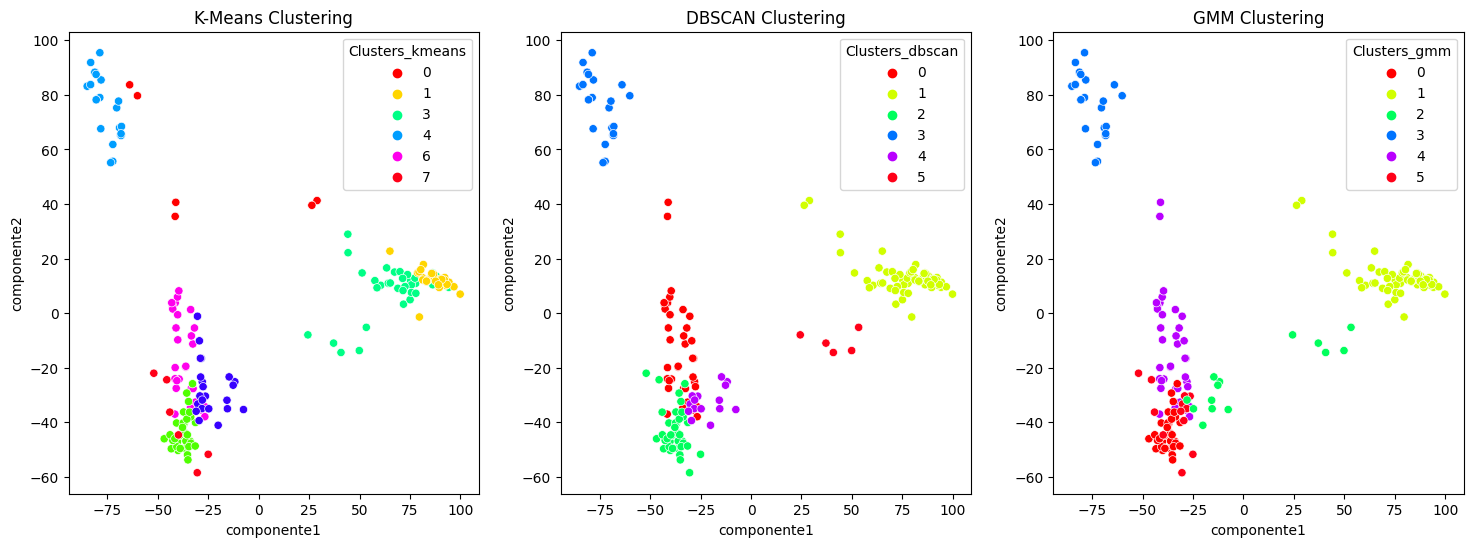

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# K-Means Clustering
sns.scatterplot(x='componente1', y='componente2', hue='Clusters_kmeans', data=pca_nombres_df2, palette='hsv', ax=axes[0])
axes[0].set_title('K-Means Clustering')

# DBSCAN Clustering
sns.scatterplot(x='componente1', y='componente2', hue='Clusters_dbscan', data=pca_nombres_df2, palette='hsv', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

# GMM Clustering
sns.scatterplot(x='componente1', y='componente2', hue='Clusters_gmm', data=pca_nombres_df2, palette='hsv', ax=axes[2])
axes[2].set_title('GMM Clustering')

plt.show()

In [ ]:
#### NO LLENAR AQUI